# Casestudy - 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 

from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
init_notebook_mode(connected=True)

# To show the plots inline
%matplotlib inline

In [2]:
customer_df = pd.read_csv(r"casestudy_2.csv",index_col=0,low_memory=False)
print(f"The Length of the data: {customer_df.shape}")
# show the last 10 rows of data 
customer_df.head(10)
customer_df.dtypes

The Length of the data: (685927, 3)


customer_email     object
net_revenue       float64
year                int64
dtype: object

In [3]:
customer_df.isna().sum()

customer_email    0
net_revenue       0
year              0
dtype: int64

# Total revenue for the 2017(current year), 2016 and 2015

In [4]:
#Grouping and perform sum over each group
total_rev=  customer_df.groupby(customer_df['year'])['net_revenue'].sum().reset_index()
print(total_rev)

   year  net_revenue
0  2015  29036749.19
1  2016  25730943.59
2  2017  31417495.03


# New Customer Revenue e.g. new customers not present in previous year only

# 2016

In [5]:
new_cus_rev_2016= customer_df.drop_duplicates(subset='customer_email')
new_cus_2016=new_cus_rev_2016.groupby(["year"]).sum().reset_index()
print(new_cus_2016[new_cus_2016["year"]==2016])


   year  net_revenue
1  2016  18245491.01


# 2017

In [6]:

df2= customer_df.copy()
df2.drop(customer_df[customer_df['year'] == 2015].index, inplace = True)
new_cus_rev_2017= df2.drop_duplicates(subset='customer_email')
new_cus_2017= new_cus_rev_2017.groupby(["year"]).sum().reset_index()
print(new_cus_2017[new_cus_2017["year"]==2017])


   year  net_revenue
1  2017  28776235.04


# Existing Customer Revenue for 2016 & 2017



In [7]:
exi_16=float(total_rev[total_rev["year"]==2016].net_revenue)-float(new_cus_2016[new_cus_2016["year"]==2016].net_revenue)
exi_17=float(total_rev[total_rev["year"]==2017].net_revenue)-float(new_cus_2017[new_cus_2017["year"]==2017].net_revenue)
print("exist reve 2016",float(total_rev[total_rev["year"]==2015].net_revenue)-float(exi_16))
print("exist reve 2017",float(total_rev[total_rev["year"]==2016].net_revenue)-float(exi_17))


exist reve 2016 21551296.60999985
exist reve 2017 23089683.59999993


# Existing Customer Growth. 

In [8]:
growth= (float(total_rev[total_rev["year"]==2016].net_revenue)-float(exi_17))-(float(total_rev[total_rev["year"]==2015].net_revenue)-float(exi_16))
growth

1538386.9900000803

# Total customers in current and previous year(for 2015,2016 & 2017)

In [9]:
total_cus=  customer_df.groupby(customer_df['year'])['customer_email'].count().reset_index()
print(total_cus)

   year  customer_email
0  2015          231294
1  2016          204646
2  2017          249987


# New customers in the years 2016 & 2017

In [10]:
new_cus_2016_count=new_cus_rev_2016.groupby(["year"])['customer_email'].count().reset_index()
print(new_cus_2016_count[new_cus_2016_count["year"]==2016])
new_cus_2017_count= new_cus_rev_2017.groupby(["year"])['customer_email'].count().reset_index()
print(new_cus_2017_count[new_cus_2017_count["year"]==2017])

   year  customer_email
1  2016          145062
   year  customer_email
1  2017          229028


# Lost customers in the year 2016

In [11]:
lost_cus_2016= df2.drop_duplicates(subset='customer_email',keep="last")
los_cus_2016= lost_cus_2016.groupby(["year"])['customer_email'].count().reset_index()
print(los_cus_2016[los_cus_2016["year"]==2016])

   year  customer_email
0  2016          183687


# Lost customers in the year 2015

In [12]:
df3= customer_df.copy()
df3.drop(customer_df[customer_df['year'] == 2017].index, inplace = True)
lost_cus_2015= df3.drop_duplicates(subset='customer_email',keep="last")
los_cus_2015= lost_cus_2015.groupby(["year"])['customer_email'].count().reset_index()
print(los_cus_2015[los_cus_2015["year"]==2015])

   year  customer_email
0  2015          171710


# Revenue lost from attrition

# 2016

In [13]:
rev_lost_2016=  ((float(total_rev[total_rev["year"]==2015].net_revenue))-((float(total_rev[total_rev["year"]==2016].net_revenue))-(float(total_rev[total_rev["year"]==2015].net_revenue))))/(float(total_rev[total_rev["year"]==2015].net_revenue))
print(f"Revenue lost from attrition for 2016= {rev_lost_2016} %")                                                                                                                             

Revenue lost from attrition for 2016= 1.1138490255354823 %


# 2017

In [14]:
rev_lost_2017=((float(total_rev[total_rev["year"]==2015].net_revenue))-((float(total_rev[total_rev["year"]==2017].net_revenue))-(float(total_rev[total_rev["year"]==2015].net_revenue))))/(float(total_rev[total_rev["year"]==2015].net_revenue))
print(f"Revenue lost from attrition for 2017= {rev_lost_2017} %")                                                                                                                          

Revenue lost from attrition for 2017= 0.9180092156865698 %


# Box plot for year and net revenue

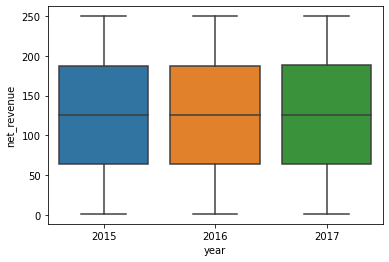

In [15]:
ax1 = sns.boxplot(y="net_revenue", x="year", data=customer_df)

# Findings

The above graph shows that net revenue has remained constant over time.

In [16]:
years=[2015,2016,2017]
rev_lost=[0,rev_lost_2016,rev_lost_2017]
lost_cus=[lost_cus_2015,lost_cus_2016,0]
new_cus_count=[0,new_cus_2016_count,new_cus_2017_count]
new_cus_rev=[0,new_cus_rev_2016,new_cus_rev_2017]
exi_cus_rev=[0,exi_16,exi_17]



# Bar plot for existing customer revenue and years

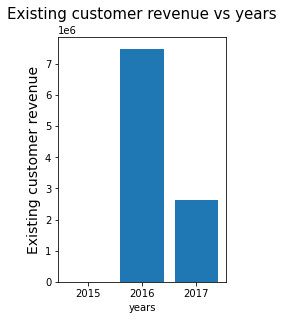

In [17]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [3, 4.50]

# Plot bar chart with data points
plt.bar(years,exi_cus_rev)

plt.title('Existing customer revenue vs years',fontsize=15,y=1.05)
plt.xlabel('years',fontsize=10)
plt.ylabel('Existing customer revenue',fontsize=14)

# Display the plot
plt.show()


# Findings

The revenue of existing customers has decreased dramatically from 2016 to 2017, as shown in the graph above.

# bar plot revenue lost from attrition vs years

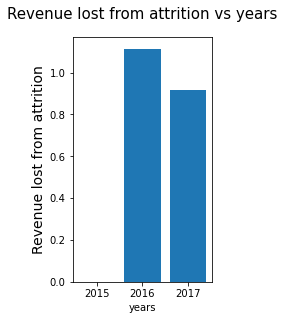

In [18]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [2.5, 4.50]
plt.bar(years,rev_lost)
plt.title('Revenue lost from attrition vs years',fontsize=15,y=1.05)
plt.xlabel('years',fontsize=10)
plt.ylabel('Revenue lost from attrition',fontsize=14)

plt.show()

# Findings

As shown in the graph above, revenue attrition has decreased from 2016 to 2017.